In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tcc_ceds_music.csv")
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [4]:
len(['artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len'])

6

In [5]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']

In [6]:
len(['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'])

24

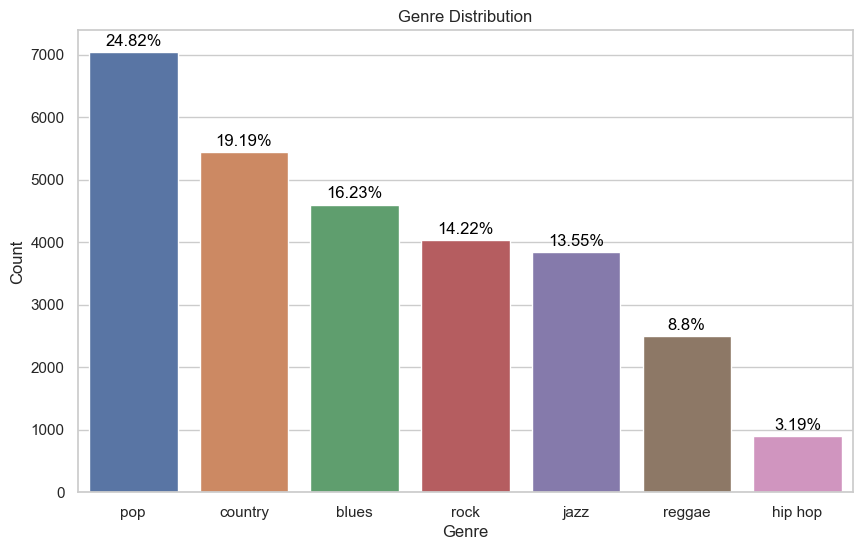

In [7]:
values = dict(df["genre"].value_counts())
total = sum(values.values())
percentages = {genre: count / total * 100 for genre, count in values.items()}

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=list(values.keys()), y=list(values.values()))
for i, count in enumerate(values.values()):
    percentage = round(percentages[list(values.keys())[i]], 2)
    ax.text(i,count+100, f"{percentage}%", ha='center', color="black")
    
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig("genre_distribution.png")

### Explore PCA and clustering based on features

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [9]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']

In [10]:
dfs = StandardScaler().fit_transform(df[features])

In [15]:
tsne = TSNE(n_iter=3000, verbose=True)
tsne_data = tsne.fit_transform(dfs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28372 samples in 0.003s...
[t-SNE] Computed neighbors for 28372 samples in 1.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28372
[t-SNE] Computed conditional probabilities for sample 2000 / 28372
[t-SNE] Computed conditional probabilities for sample 3000 / 28372
[t-SNE] Computed conditional probabilities for sample 4000 / 28372
[t-SNE] Computed conditional probabilities for sample 5000 / 28372
[t-SNE] Computed conditional probabilities for sample 6000 / 28372
[t-SNE] Computed conditional probabilities for sample 7000 / 28372
[t-SNE] Computed conditional probabilities for sample 8000 / 28372
[t-SNE] Computed conditional probabilities for sample 9000 / 28372
[t-SNE] Computed conditional probabilities for sample 10000 / 28372
[t-SNE] Computed conditional probabilities for sample 11000 / 28372
[t-SNE] Computed conditional probabilities for sample 12000 / 28372
[t-SNE] Computed conditional probabilities for sam

<Axes: xlabel='x', ylabel='y'>

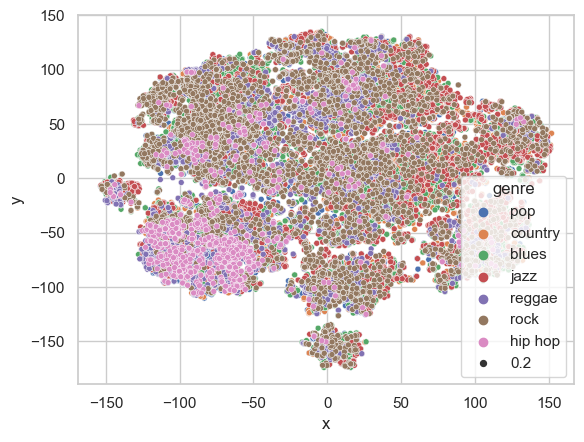

In [16]:
plt.figure()
df2 =df.copy()
df2["x"] = tsne_data[:,0]
df2["y"] = tsne_data[:,1]
sns.scatterplot(data=df2, x="x", y="y", hue="genre", size=0.2)

In [18]:
from umap import UMAP

umap = UMAP(n_components=2, init="random", random_state=0)
umap_data = umap.fit_transform(dfs)

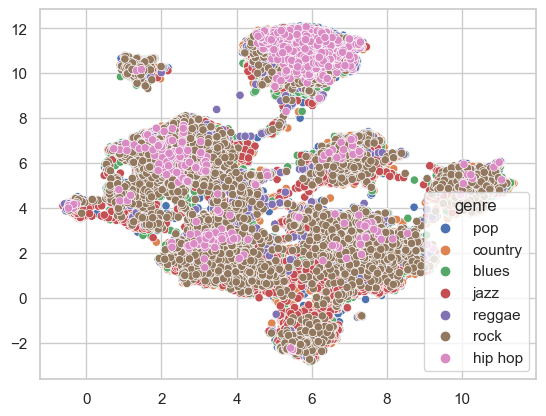

In [24]:
plt.figure()
df3 =df.copy()
df3["x"] = umap_data[:,0]
df3["y"] = umap_data[:,1]
sns.scatterplot(data=df3, x="x", y="y", hue="genre")
plt.xlabel("")
plt.ylabel("")
plt.savefig("umap-genres.png")

In [168]:
df_cluster = df3[["x", "y"]]

from sklearn.cluster import OPTICS, KMeans, AgglomerativeClustering, ward_tree, Birch, spectral_clustering

dbs = KMeans(n_clusters=9, n_init="auto")
dbs_data = dbs.fit_predict(df_cluster)
df3["cluster"] = dbs_data

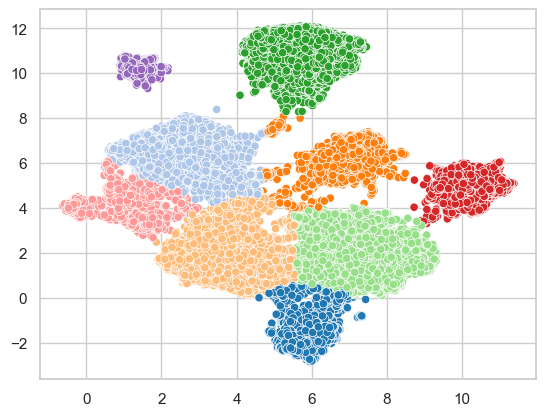

In [169]:
n_clusters = len(np.unique(dbs_data))

plt.figure()
plt.set_cmap("tab20")
sns.scatterplot(data=df3, x="x", y="y", hue="cluster", palette="tab20")
plt.xlabel("")
plt.ylabel("")
plt.legend([],[], frameon=False)
plt.savefig(f"umap-kmeans-{n_clusters}-clusters.png")